In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3

warnings.filterwarnings("ignore")

In [2]:
conn=sqlite3.connect("data/inventory_data.db")

In [6]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
tables

name
0                 sales
1       purchase_prices
2         end_inventory
3       begin_inventory
4        vendor_invoice
5             purchases
6  vendor_sales_summary

In [5]:
pd.read_sql_query("SELECT * FROM vendor_sales_summary LIMIT 5",conn)

VendorNumber                VendorName  Brand              Description  \
0          1128         BROWN-FORMAN CORP   1233  Jack Daniels No 7 Black   
1          4425     MARTIGNETTI COMPANIES   3405    Tito's Handmade Vodka   
2         17035         PERNOD RICARD USA   8068         Absolut 80 Proof   
3          3960  DIAGEO NORTH AMERICA INC   4261   Capt Morgan Spiced Rum   
4          3960  DIAGEO NORTH AMERICA INC   3545          Ketel One Vodka   

   PurchasePrice  ActualPrice  Volume  TotalPurchaseQuantity  \
0          26.27        36.99  1750.0                 145080   
1          23.19        28.99  1750.0                 164038   
2          18.24        24.99  1750.0                 187407   
3          16.17        22.99  1750.0                 201682   
4          21.89        29.99  1750.0                 138109   

   TotalPurchaseDollars  TotalSalesQuantity  TotalSalesDollars  \
0            3811251.60            142049.0         5101919.51   
1            3804041.22            160247.0         4819073.49   
2            3418303.68            187140.0         4538120.60   
3            3261197.94            200412.0         4475972.88   
4            3023206.01            135838.0         4223107.62   

   TotalSalesPrice  TotalExciseTax  FreightCost  StockTurnover  \
0        672819.31       260999.20     68601.68       0.979108   
1        561512.37       294438.66    144929.24       0.976890   
2        461140.15       343854.07    123780.22       0.998575   
3        420050.01       368242.80    257032.07       0.993703   
4        545778.28       249587.83    257032.07       0.983556   

   SalesToPurchaseRatio  GrossProfit  ProfitMargin  
0              1.338647   1290667.91     25.297693  
1              1.266830   1015032.27     21.062810  
2              1.327594   1119816.92     24.675786  
3              1.372493   1214774.94     27.139908  
4              1.396897   1199901.61     28.412764

In [7]:
df=pd.read_sql_query("SELECT * FROM vendor_sales_summary",conn)

In [8]:
df.describe().T

count          mean            std       min  \
VendorNumber           10692.0  1.065065e+04   18753.519148      2.00   
Brand                  10692.0  1.803923e+04   12662.187074     58.00   
PurchasePrice          10692.0  2.438530e+01     109.269375      0.36   
ActualPrice            10692.0  3.564367e+01     148.246016      0.49   
Volume                 10692.0  8.473605e+02     664.309212     50.00   
TotalPurchaseQuantity  10692.0  3.140887e+03   11095.086769      1.00   
TotalPurchaseDollars   10692.0  3.010669e+04  123067.799627      0.71   
TotalSalesQuantity     10692.0  3.077482e+03   10952.851391      0.00   
TotalSalesDollars      10692.0  4.223907e+04  167655.265984      0.00   
TotalSalesPrice        10692.0  1.879378e+04   44952.773386      0.00   
TotalExciseTax         10692.0  1.774226e+03   10975.582240      0.00   
FreightCost            10692.0  6.143376e+04   60938.458032      0.09   
StockTurnover          10692.0  1.706793e+00       6.020460      0.00   
SalesToPurchaseRatio   10692.0  2.504390e+00       8.459067      0.00   
GrossProfit            10692.0  1.213238e+04   46224.337964 -52002.78   
ProfitMargin           10692.0          -inf            NaN      -inf   

                                25%           50%           75%           max  
VendorNumber            3951.000000   7153.000000   9552.000000  2.013590e+05  
Brand                   5793.500000  18761.500000  25514.250000  9.063100e+04  
PurchasePrice              6.840000     10.455000     19.482500  5.681810e+03  
ActualPrice               10.990000     15.990000     28.990000  7.499990e+03  
Volume                   750.000000    750.000000    750.000000  2.000000e+04  
TotalPurchaseQuantity     36.000000    262.000000   1975.750000  3.376600e+05  
TotalPurchaseDollars     453.457500   3655.465000  20738.245000  3.811252e+06  
TotalSalesQuantity        33.000000    261.000000   1929.250000  3.349390e+05  
TotalSalesDollars        729.220000   5298.045000  28396.915000  5.101920e+06  
TotalSalesPrice          289.710000   2857.800000  16059.562500  6.728193e+05  
TotalExciseTax             4.800000     46.570000    418.650000  3.682428e+05  
FreightCost            14069.870000  50293.620000  79528.990000  2.570321e+05  
StockTurnover              0.807229      0.981529      1.039342  2.745000e+02  
SalesToPurchaseRatio       1.153729      1.436894      1.665449  3.529286e+02  
GrossProfit               52.920000   1399.640000   8660.200000  1.290668e+06  
ProfitMargin              13.324515     30.405457     39.956135  9.971666e+01

In [11]:
def plot_hist_kde_box(df, cols=None):
   
    if cols is None:
        cols = df.select_dtypes(include=["number"]).columns
    
    for col in cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        sns.histplot(df[col].dropna(), kde=True, ax=axes[0], bins=30)
        axes[0].set_title(f"{col}")
        
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f"{col}")
        
        plt.tight_layout()
        plt.show()

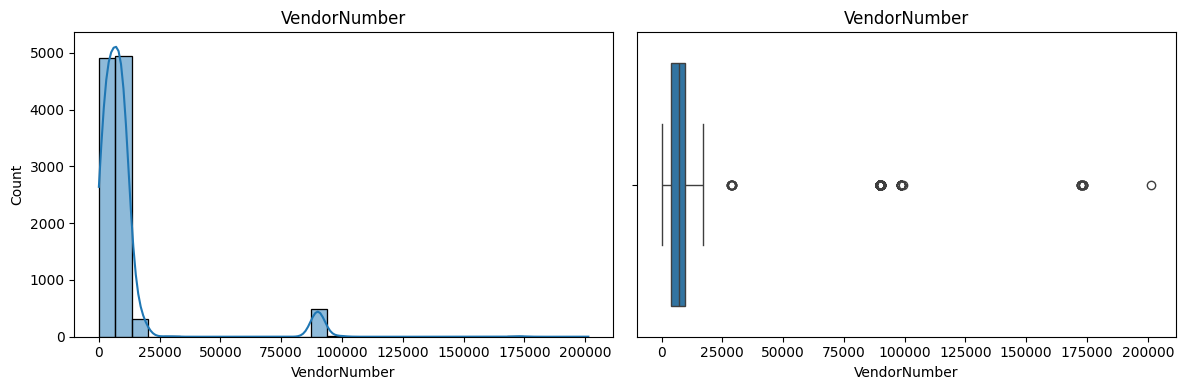

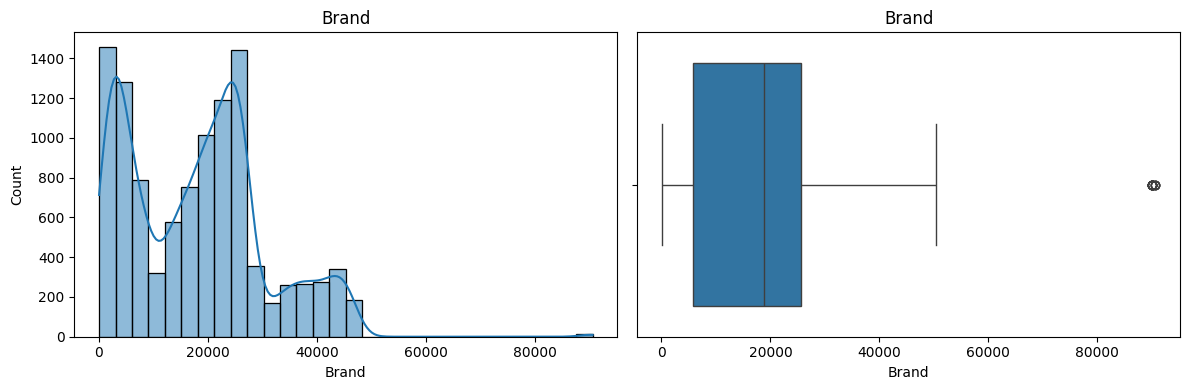

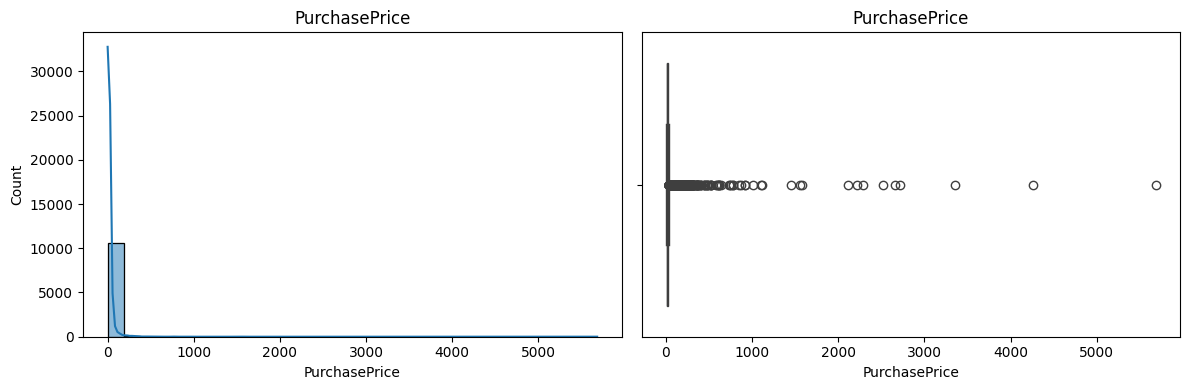

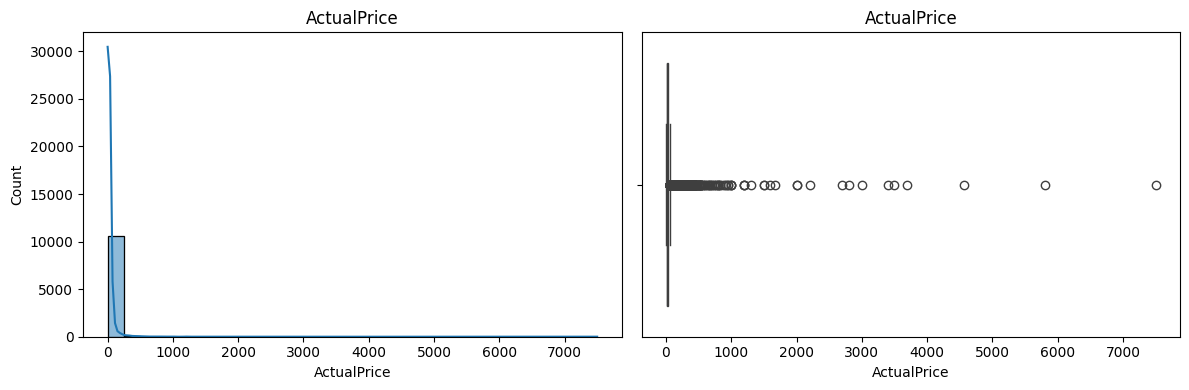

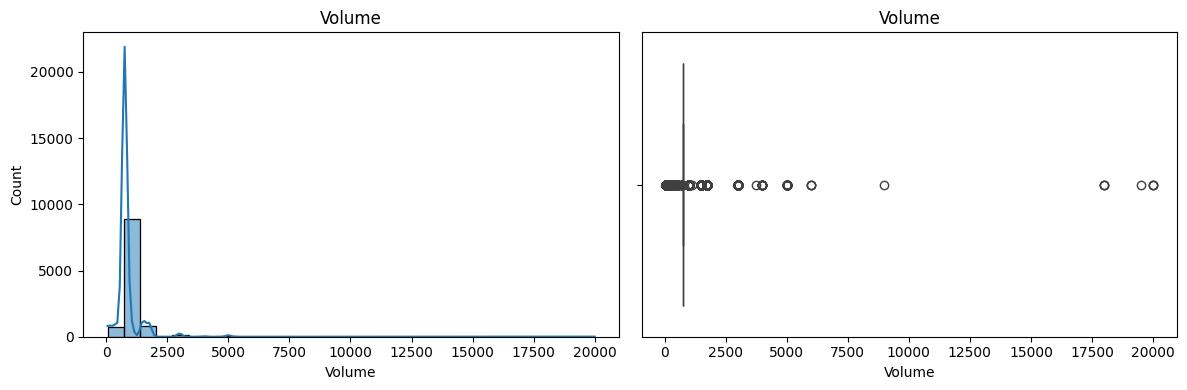

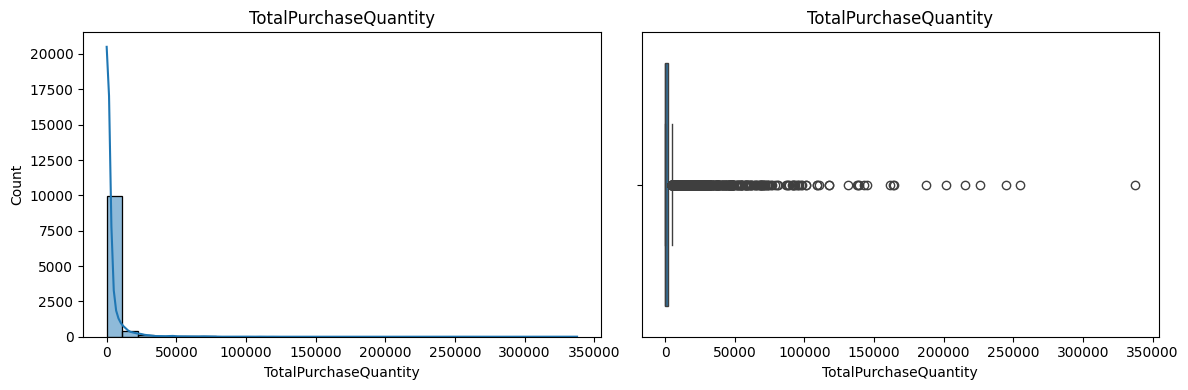

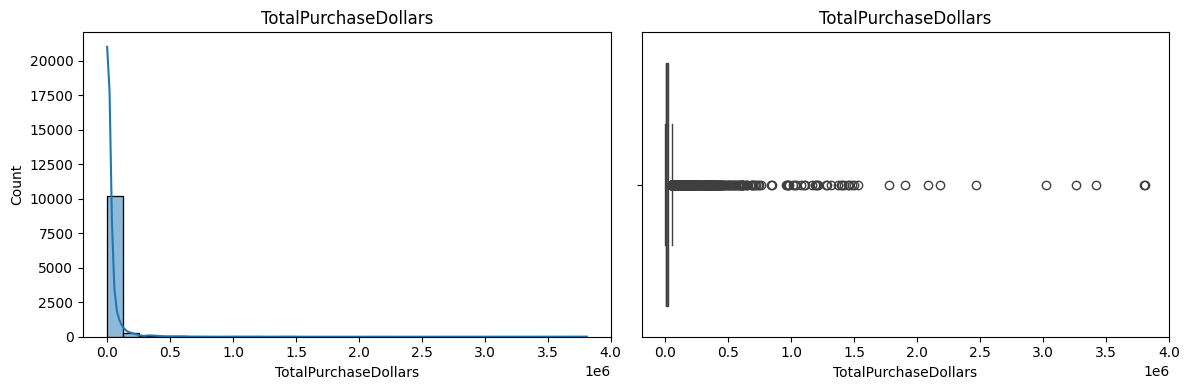

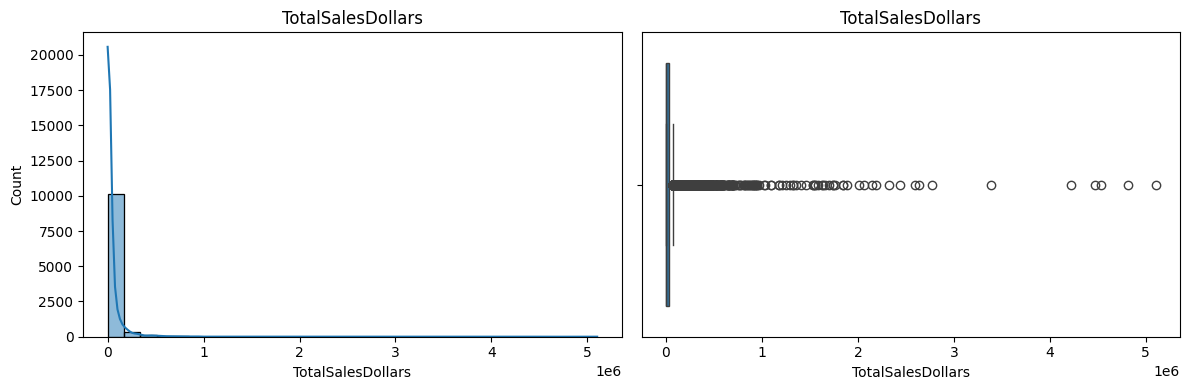

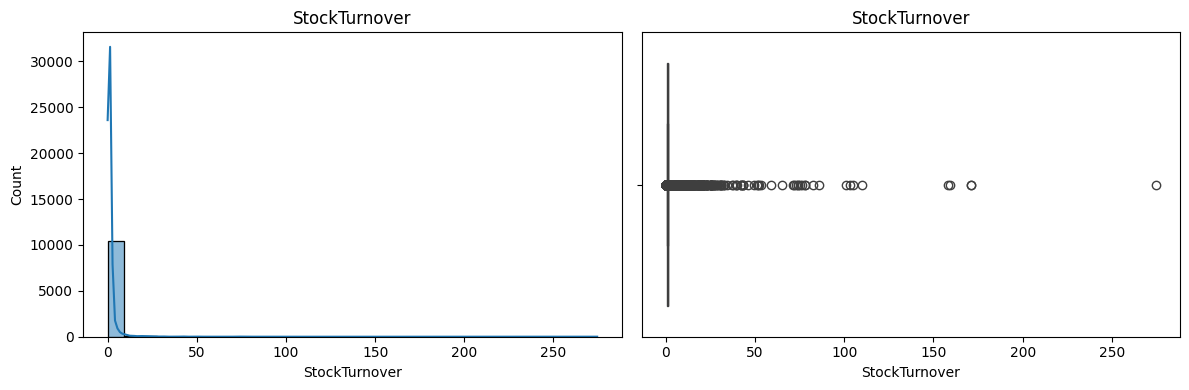

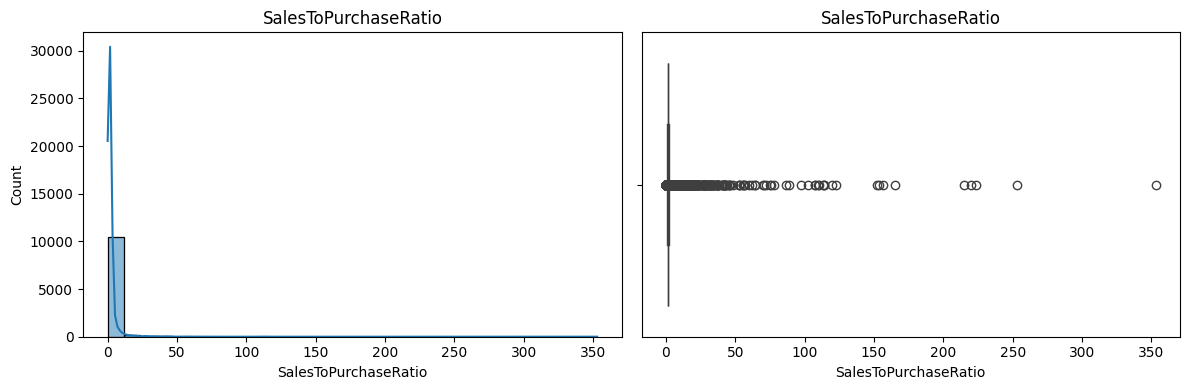

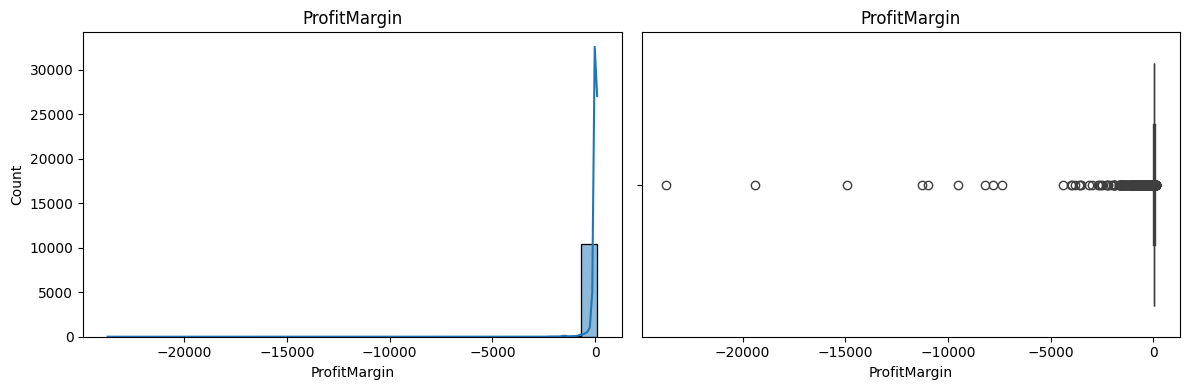

In [12]:
plot_hist_kde_box(df)

In [13]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'StockTurnover',
       'SalesToPurchaseRatio', 'GrossProfit', 'ProfitMargin'],
      dtype='object')

In [17]:
df = pd.read_sql_query(
    """SELECT * FROM vendor_sales_summary
                     WHERE 
                     GrossProfit>0 AND
                     ProfitMargin>0 AND 
                     TotalSalesQuantity>0
                     """,conn
)

In [18]:
df.shape

(8564, 18)

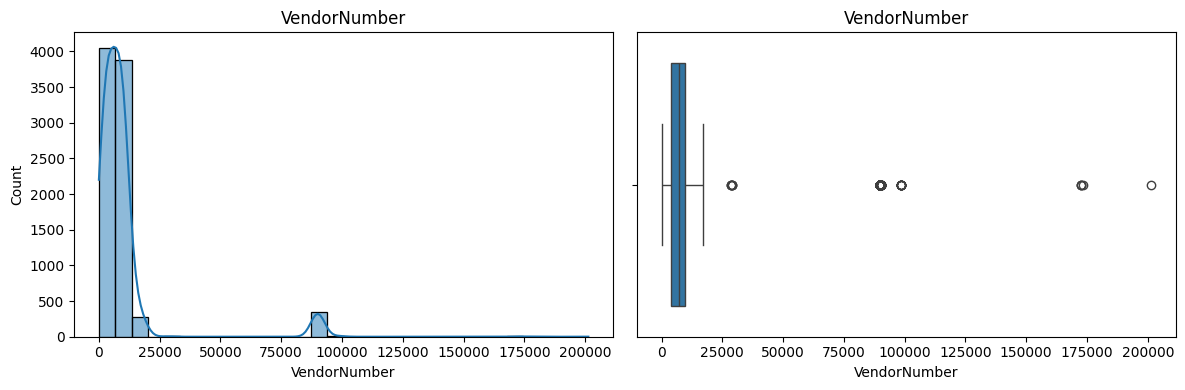

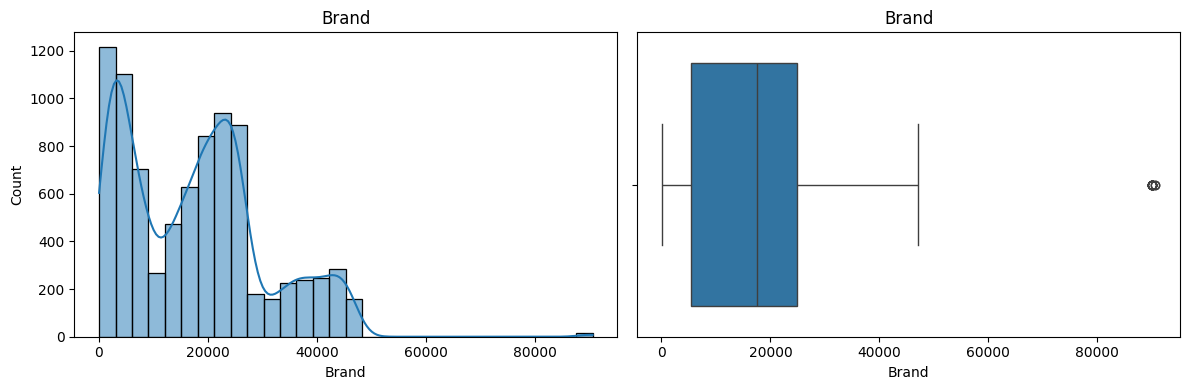

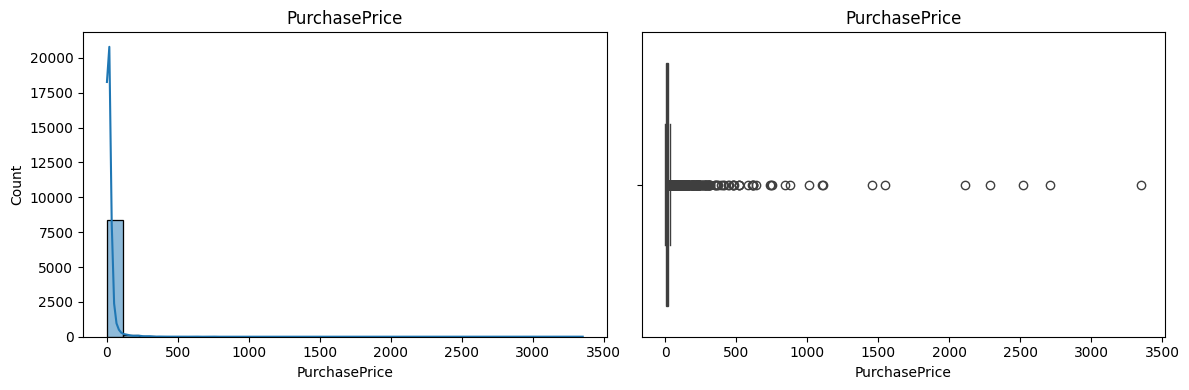

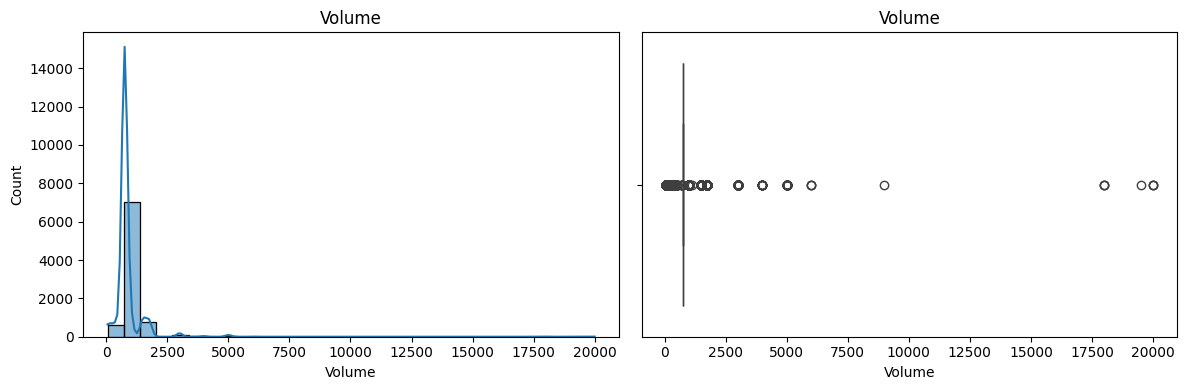

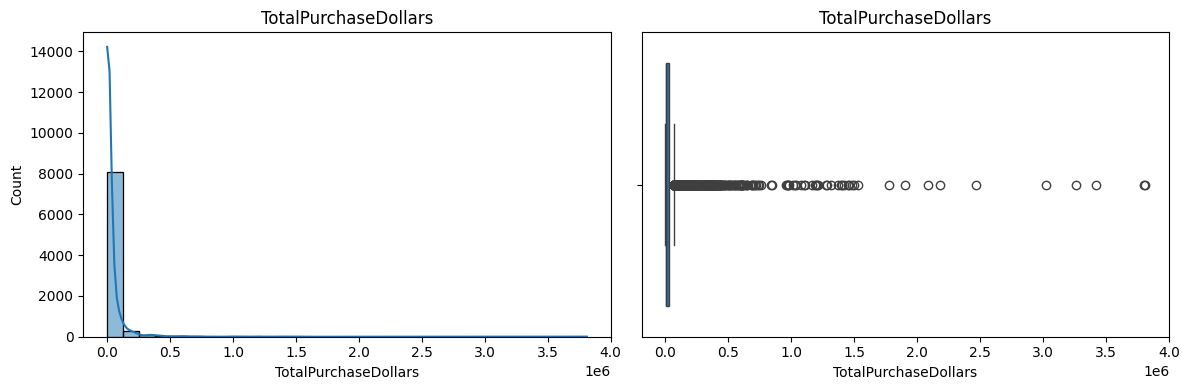

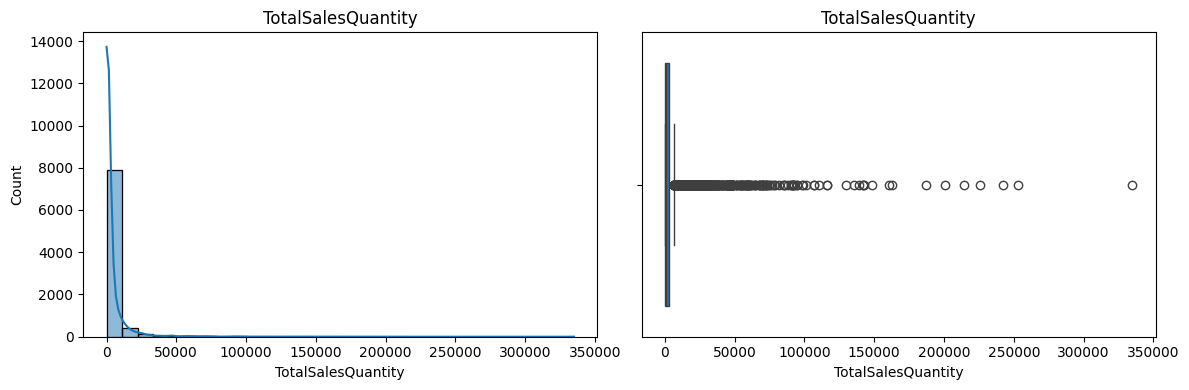

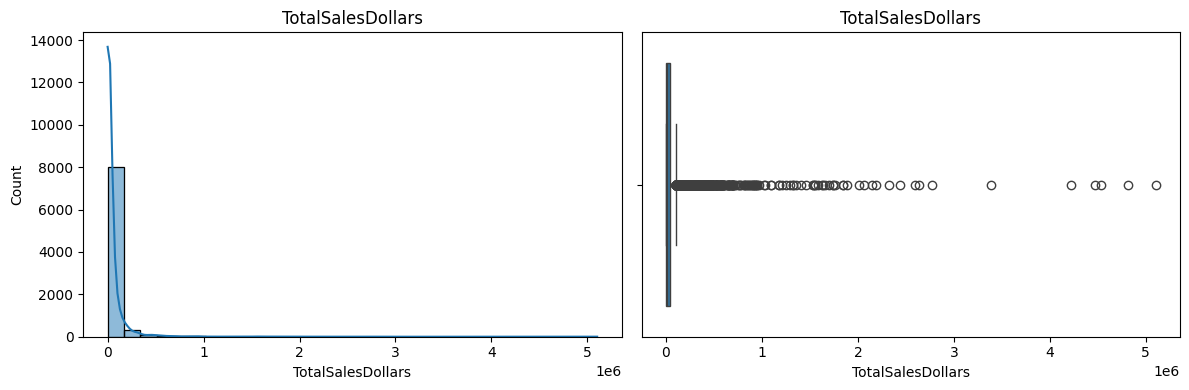

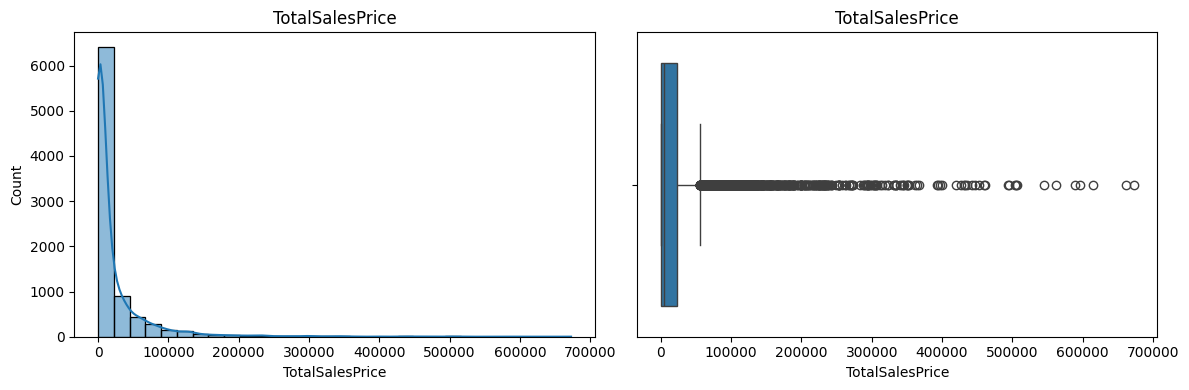

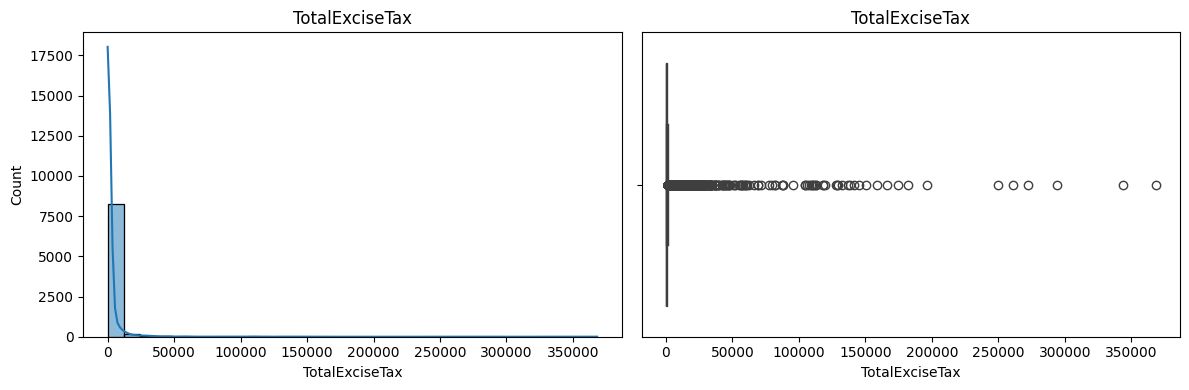

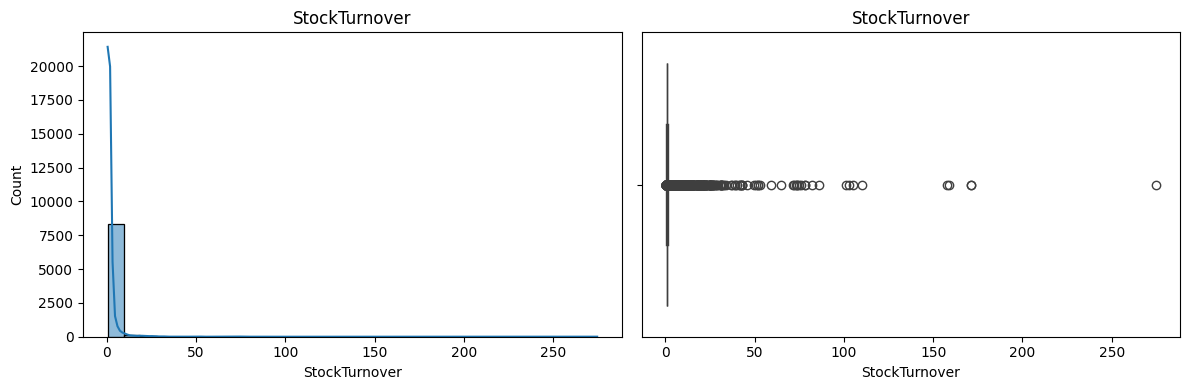

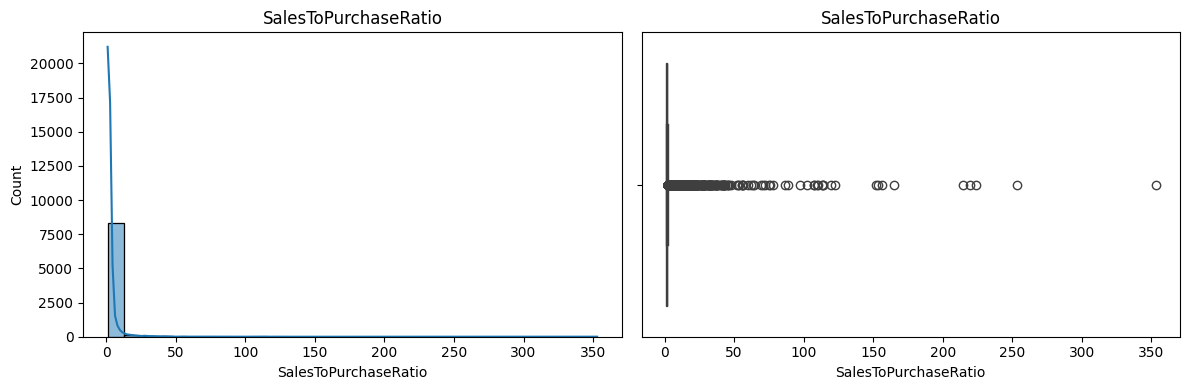

In [20]:
plot_hist_kde_box(df)

In [21]:
 # for top 10 brands and categories
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) 
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

In [27]:
numerical_cols = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [28]:
df.shape

(8564, 18)